# Inference for MNIST testset

In [1]:
import torch, torchvision
from torch.utils.data import DataLoader
from torchvision import transforms

mnist_trans = torchvision.transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
mnist_test_dataset = torchvision.datasets.MNIST(root='data\mnist', train=False, download=True, transform=mnist_trans)
mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=256, shuffle=False)

In [2]:
from torch import nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [3]:
mnist_model = ConvNet()
mnist_model.load_state_dict(torch.load('saved_models/mnist_conv_model.ckpt'))

<All keys matched successfully>

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
import numpy as np

mnist_model.to(device)
mnist_model.eval()

criterion = nn.CrossEntropyLoss()
with torch.no_grad():
    correct = 0
    total = 0
    losses = []
    for images, labels in mnist_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = mnist_model(images)
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Average Test Loss of the MNIST model: {}'.format(np.mean(losses)))
    print('Test Accuracy of the MNIST model: {} %'.format((correct / total) * 100))

Average Test Loss of the MNIST model: 0.03329752847603231
Test Accuracy of the MNIST model: 98.86 %


# Inference for CIFAR testset

In [6]:
cifar_trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
cifar_test_dataset = torchvision.datasets.CIFAR10(root='data\cifar', train=False, download=True, transform=cifar_trans)
cifar_test_loader = DataLoader(cifar_test_dataset, batch_size=256, shuffle=False)

Files already downloaded and verified


In [7]:
class CIFAR_CNN(nn.Module):

    def __init__(self):
        super(CIFAR_CNN, self).__init__()

        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )


    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)

        return x

In [8]:
cifar_model = CIFAR_CNN()
if device == "cuda":
    cifar_model.load_state_dict(torch.load('saved_models/cifar_conv_model.ckpt'))
else:
    cifar_model.load_state_dict(torch.load('saved_models/cifar_conv_model.ckpt', map_location=torch.device('cpu')))

In [9]:
cifar_model.to(device)
cifar_model.eval()

criterion = nn.CrossEntropyLoss()
with torch.no_grad():
    correct = 0
    total = 0
    losses = []
    for images, labels in cifar_test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cifar_model(images)
        loss = criterion(outputs, labels)
        losses.append(loss.item())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Average Test Loss of the CIFAR model: {}'.format(np.mean(losses)))
    print('Test Accuracy of the CIFAR model: {} %'.format((correct / total) * 100))

Average Test Loss of the CIFAR model: 0.513016489893198
Test Accuracy of the CIFAR model: 87.13 %


# Plotting loss vs hyperparameters for CIFAR

In [10]:
import pickle
import matplotlib.pyplot as plt

with open('variables/batch_momentum.pickle', 'rb') as f:
    train_loss_batch, test_loss_batch, train_loss_mom, test_loss_mom = pickle.load(f)

with open('variables/learning_rate.pickle', 'rb') as f:
    train_loss_lr, test_loss_lr = pickle.load(f)

## Plotting loss vs batch size

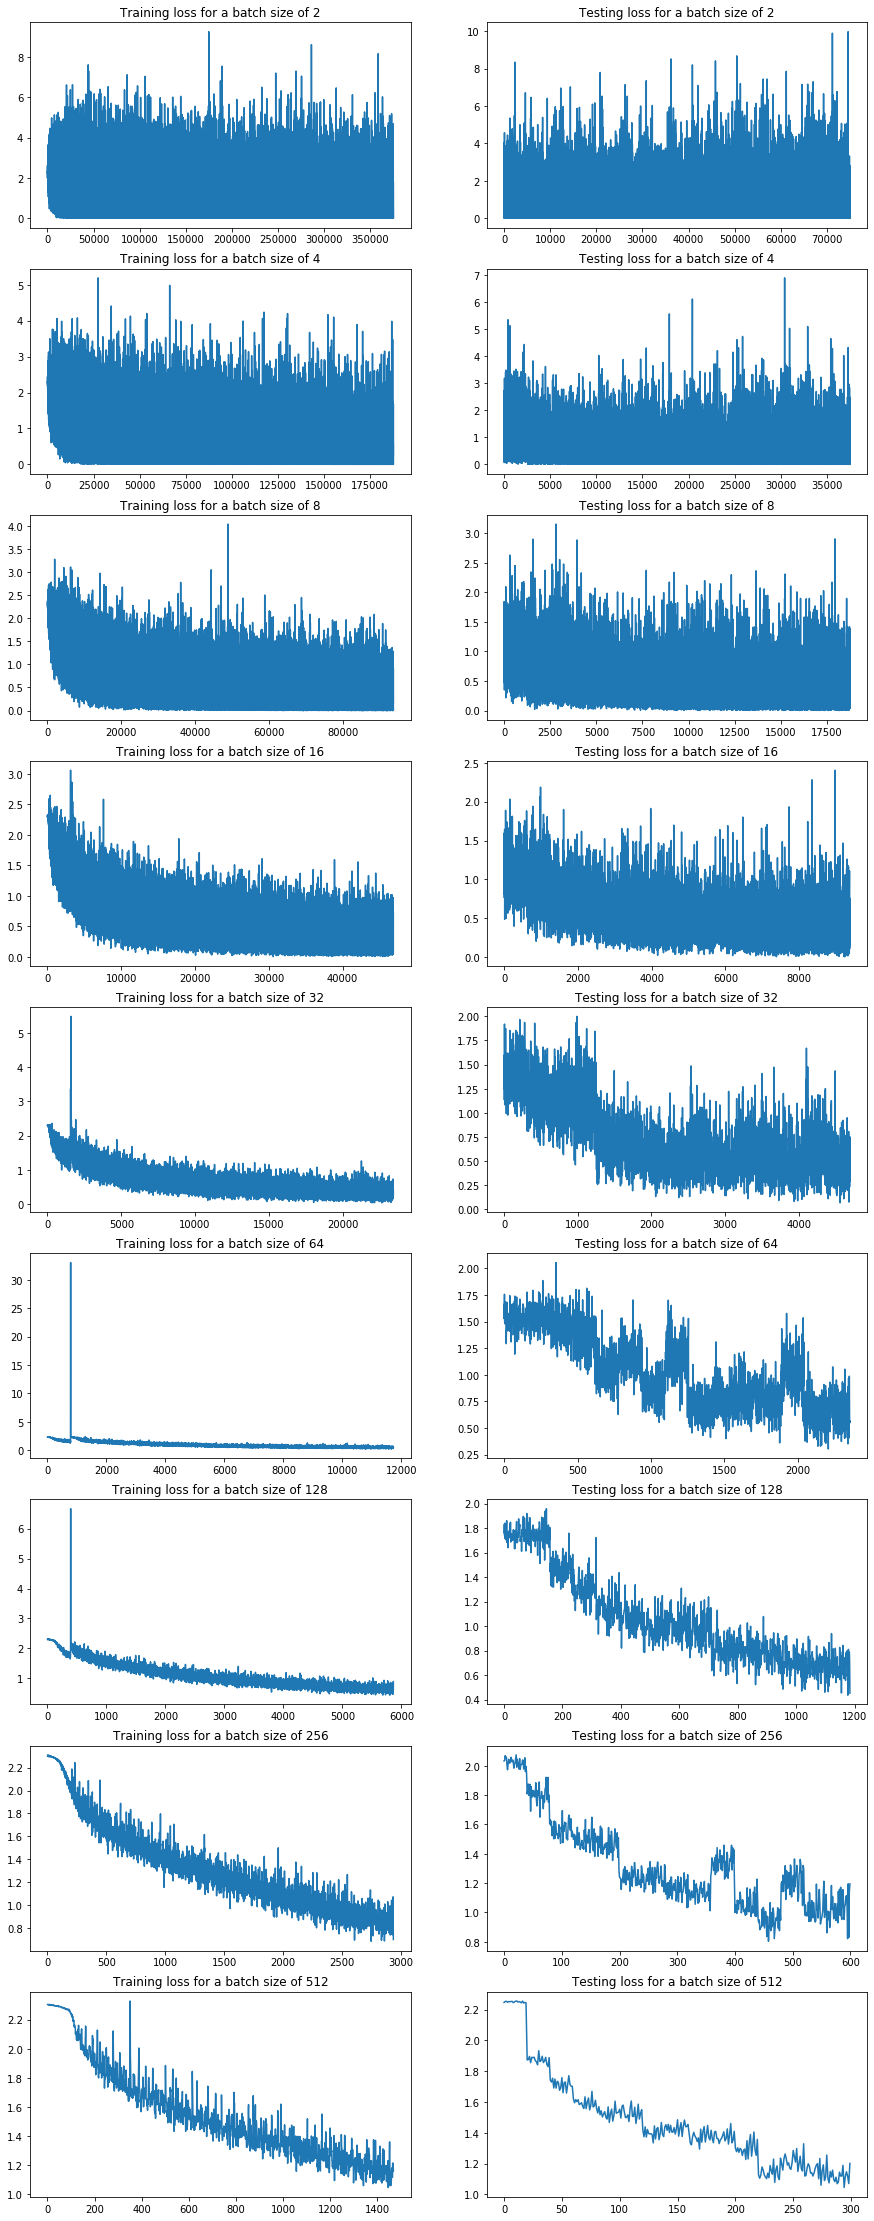

In [11]:
num_batches = len(train_loss_batch)
fig_batch, axes_batch = plt.subplots(num_batches, 2, figsize=(15,40))
for batch_idx in range(num_batches):
    training_ax = axes_batch[batch_idx][0]
    testing_ax = axes_batch[batch_idx][1]
    
    training_ax.plot(train_loss_batch[batch_idx])
    training_ax.set_title('Training loss for a batch size of {}'.format(2 ** (batch_idx + 1)))
    testing_ax.plot(test_loss_batch[batch_idx])
    testing_ax.set_title('Testing loss for a batch size of {}'.format(2 ** (batch_idx + 1)))
plt.show()

## Plotting loss vs learning rate

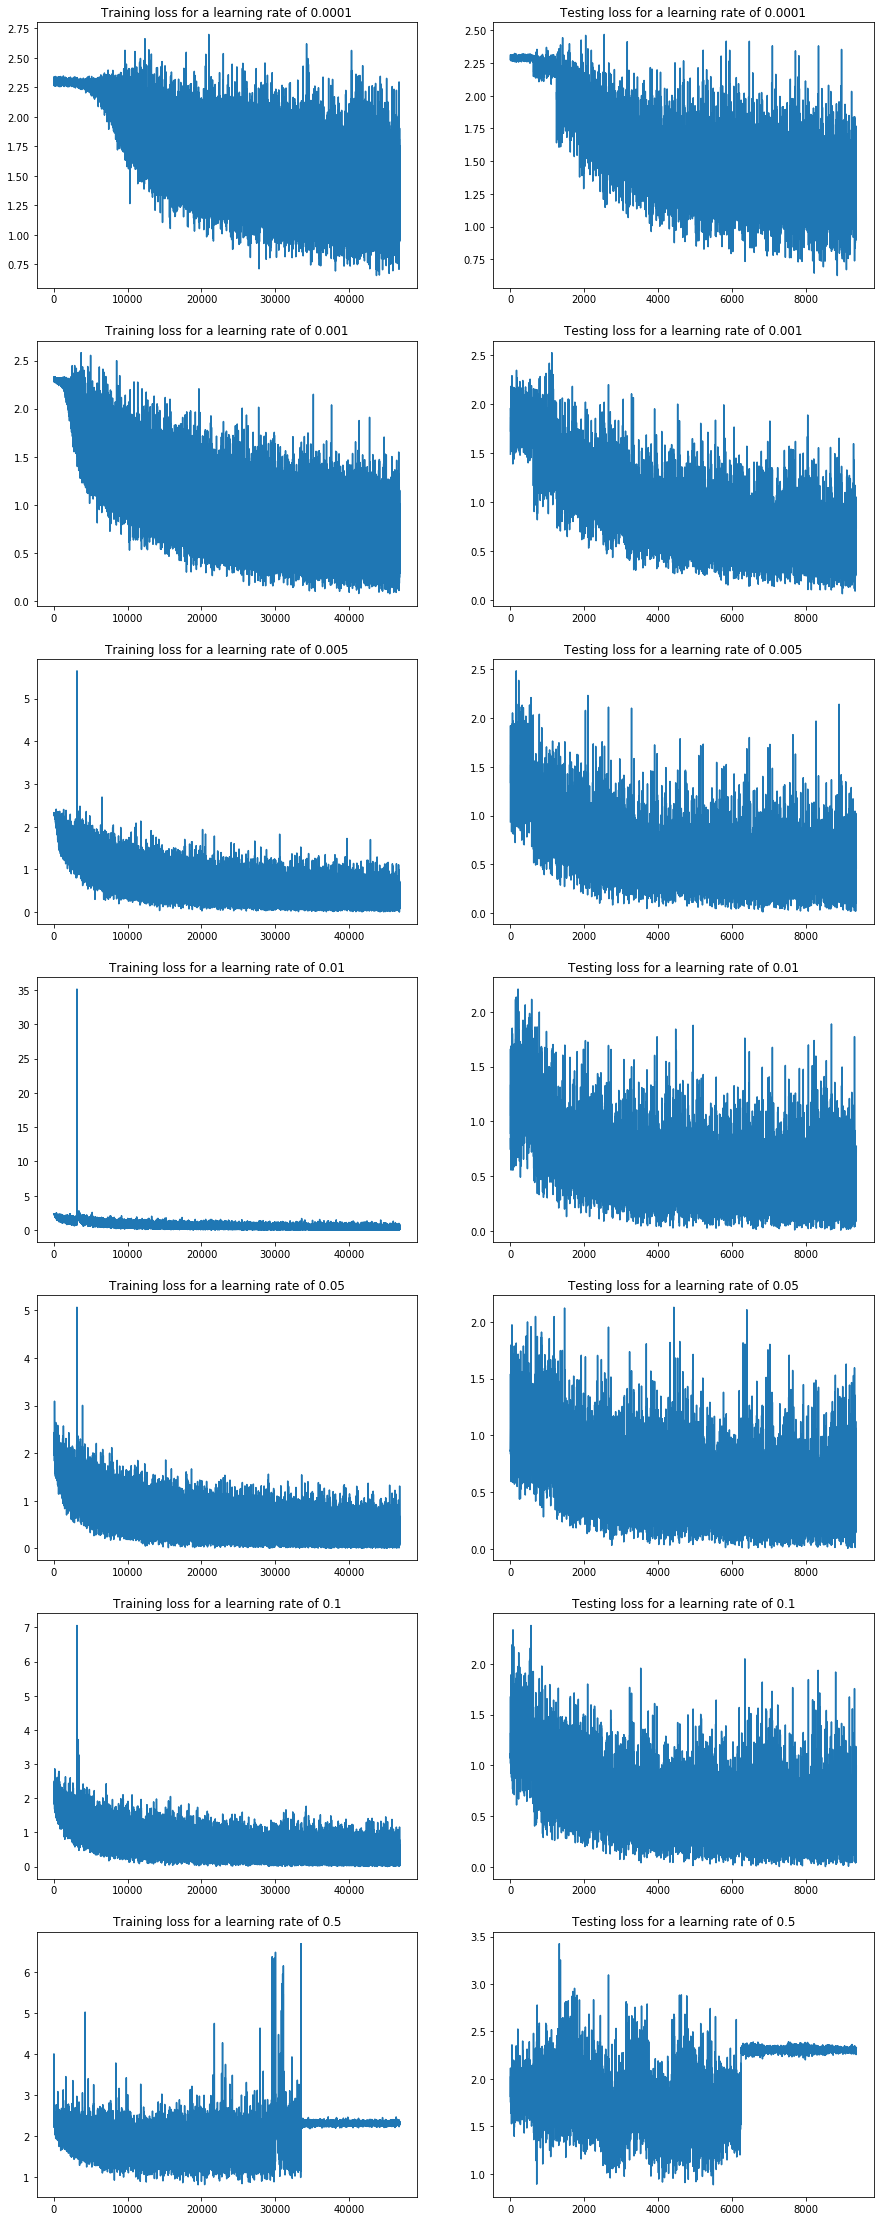

In [12]:
plt.close(fig_batch)

lrs = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
num_lrs = len(train_loss_lr)
fig_lr, axes_lr = plt.subplots(num_lrs, 2, figsize=(15,40))
for lr_idx in range(num_lrs):
    training_ax = axes_lr[lr_idx][0]
    testing_ax = axes_lr[lr_idx][1]
    
    training_ax.plot(train_loss_lr[lr_idx])
    training_ax.set_title('Training loss for a learning rate of {}'.format(lrs[lr_idx]))
    testing_ax.plot(test_loss_lr[lr_idx])
    testing_ax.set_title('Testing loss for a learning rate of {}'.format(lrs[lr_idx]))
plt.show()

## Plotting loss vs momentum

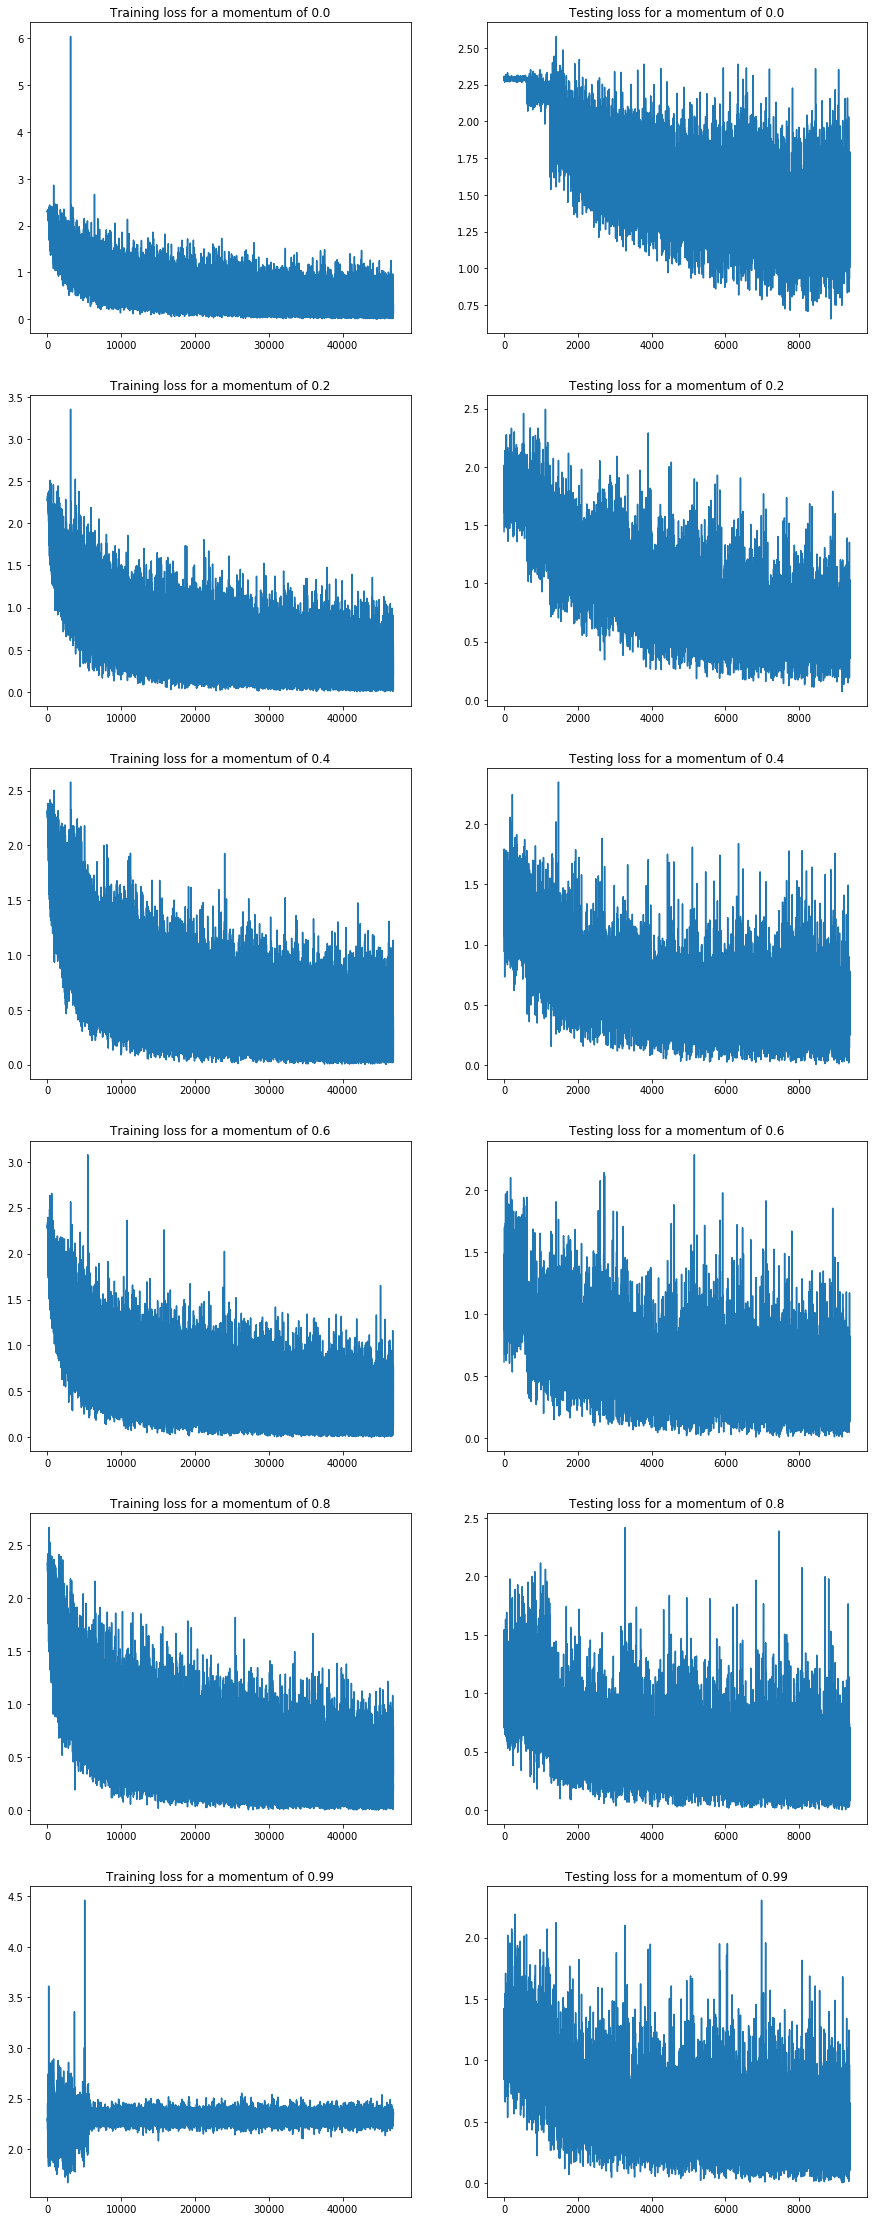

In [13]:
plt.close(fig_lr)

momentums = [0.0, 0.2, 0.4, 0.6, 0.8, 0.99]
num_moms = len(train_loss_mom)
fig_mom, axes_mom = plt.subplots(num_moms, 2, figsize=(15,40))
for mom_idx in range(num_moms):
    training_ax_mom = axes_mom[mom_idx][0]
    testing_ax_mom = axes_mom[mom_idx][1]
    
    training_ax_mom.plot(train_loss_mom[mom_idx])
    training_ax_mom.set_title('Training loss for a momentum of {}'.format(momentums[mom_idx]))
    testing_ax_mom.plot(test_loss_mom[mom_idx])
    testing_ax_mom.set_title('Testing loss for a momentum of {}'.format(momentums[mom_idx]))
plt.show()

# Written Answers to Question 6

## Momentum
Momentum does start to have a substantial effect once it gets high enough. Momentum seems to "push" the model along with respect to its convergence path. For example, as momentum increases (to a certain point), the model converges faster and to a lower loss. However, once it reaches a certain point, the model actually starts to diverge. This can be seen in our graph with a momentum equal to 0.99.

## Learning Rate
Learning rate seems to have less of an effect than momentum, given that its value is in an acceptable range. When it is extremely low (lr = 0.0001), we can see that it takes a long time for the model to converge. When it is extremely high (lr = 0.5), we can see that the model becomes unstable. However, when it is in an acceptable range, it does not change the shape of the convergence path much.

## Depth of CNN
In our research, we came across the notion of a wide network vs a deep network. Essentially, a wide network is able to handle a larger set of inputs, which means it is good at memorizing, but bad at generalizing. On the other hand, deep networks are able to capture successive abstractions in the data. This attribute of deep networks is what allows us to classify a set of pixel values e.g. first we have to make sense of raw pixel data, then slowly ups the abstraction until it can identify complete objects within the image.

## Our Hyperparameters
For our final model, our hyperparameters are as follows:
batch_size = 512
learning_rate = 0.01
momentum = 0.3
We determined these values after analyzing the previous three sets of graphs.